<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for immage classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [3]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [4]:
# insert code here, 
#  classification task

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import confusion_matrix

In [5]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras


# Checking keras and tensorflow versions
print("Keras version:", keras.__version__)
print("Tensorflow version:", tf.__version__)

# Import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.utils import to_categorical

Keras version: 2.4.0
Tensorflow version: 2.4.1


In [6]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard
from tensorflow.python.client import device_lib

In [7]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8446418323274826902
]


## Load data
Use the **Keras**' load method.

In [8]:
# insert code here
from keras.datasets import cifar10

In [9]:
# insert code here (X=images, y=labels)
(train_images_all, train_labels_all), (test_images_all, test_labels_all) = cifar10.load_data()

In [10]:
# Summarize loaded dataset
print('Train: images=%s, y=%s' % (train_images_all.shape, train_labels_all.shape))
print('Test: images=%s, y=%s' % (test_images_all.shape, test_labels_all.shape))

# There are 50,000 examples in the training dataset and 10,000 in the test dataset.
# The images are squared with 32×32 pixels and color, with three channels (colour).

Train: images=(50000, 32, 32, 3), y=(50000, 1)
Test: images=(10000, 32, 32, 3), y=(10000, 1)


In [11]:
train_images_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
train_images_all.shape

(50000, 32, 32, 3)

In [13]:
test_images_all.shape

(10000, 32, 32, 3)

In [14]:
# Take a small sample of data
size = 1000
train_images = train_images_all[:size, :, :, :]
train_labels = train_labels_all[:size,:]
test_images = test_images_all[0:size, :, :, :]
test_labels = test_labels_all[0:size,:]

In [15]:
train_images.shape

(1000, 32, 32, 3)

In [16]:
train_labels.shape

(1000, 1)

In [17]:
classes= (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

In [18]:
train_labels_all

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Check some data

In [19]:
# insert code here
def check_one(data, label, id=None, actual=None, compare=False):
    # check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (4,4))
    plt.imshow(im)

    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Class %d (%s)' % (l_id, classes[l_id]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [20]:
# insert code here
def check_ten(data, label, actual=None, compare=False):
    # check ten
    fig, ax = plt.subplots(2, 5, figsize= (11,5))
    fig.subplots_adjust(left = 0.02, right = 0.98, top = 0.8, wspace = 0.2, hspace = 0.2)
    fig.suptitle('Check Data', fontsize = 11, fontweight = 'bold')
    
    plt.rcParams.update({'font.size': 9})
    
    ids = np.random.randint(data.shape[0], size = 10)
    r = 0
    c = 0
    
    for id in ids:
        im = data[id]
        
        # original image
        ax[r, c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r, c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    
        else:
            ax[r, c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r, c].set_xticks([])
        ax[r, c].set_yticks([])
    
        c += 1
        if c > 4:
            r += 1
            c = 0
    
    plt.show()

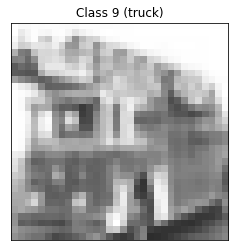

In [21]:
check_one(train_images,train_labels.flatten())

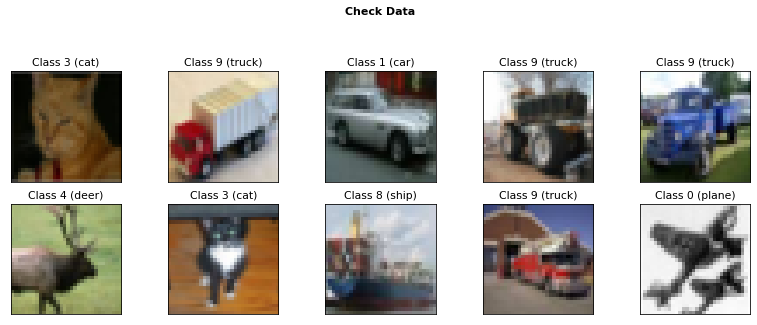

In [22]:
check_ten(train_images,train_labels.flatten())

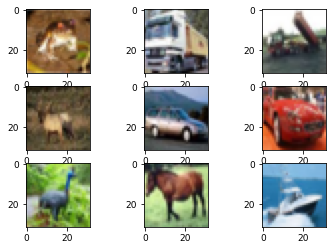

In [23]:
# plot first few images
for i in range(9):
    # define subplots
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i])
# Show the figure
plt.show()

## Prepare data

In [24]:
# insert code here
# Input data
_, img_rows, img_cols, img_channels = train_images.shape
num_classes = len(set(train_labels.flatten()))

# Convert the target to categorical
y_train = to_categorical(
    train_labels,
    num_classes = num_classes,
    dtype = 'uint8')

y_test = to_categorical(
    test_labels,
    num_classes = num_classes,
    dtype = 'uint8')

In [25]:
train_labels

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [9],
       [5],
       [7],
       [9],
       [2],
       [2],
       [5],
       [2],
       [4],
       [3],
       [1],
       [1],
       [8],
       [2],
       [1],
       [1],
       [4],
       [9],
       [7],
       [8],
       [5],
       [9],
       [6],
       [7],
       [3],
       [1],
       [9],
       [0],
       [3],
       [1],
       [3],
       [5],
       [4],
    

In [26]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
train_labels[0]

array([6], dtype=uint8)

In [28]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [29]:
# insert code here
model = Sequential()

In [30]:
model.add(Conv2D(32, kernel_size = 3, activation='relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))          

model.add(Conv2D(64, kernel_size = 3, activation='relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))         
model.add(MaxPool2D(pool_size = (2, 2))) # reducing complexity (summarising). You don't use it if you have black and white images and very small. Could be max or average
model.add(Dropout(0.25)) # To reduce overfits
          
model.add(Conv2D(138, kernel_size = 3, activation='relu', padding = 'same'))
model.add(Conv2D(138, kernel_size = 3, activation='relu'))          
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
          
model.add(Flatten()) # one dimension (one columns). A link to convolutional layer to NLP
model.add(Dense(512, activation = 'relu'))          
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))          
model.add(Dropout(0.5))
        
model.add(Dense(num_classes, activation = 'softmax'))

In [31]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

## Compile the model

In [32]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

##  Fit the training data

In [33]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [34]:
%%time
# Fit the model on a training set

history = model.fit(
    train_images,
    y_train,
    validation_split = 0.2,
    
    # epochs = 150
    epochs = 150, # training cycles
    # batch size = 100,
    batch_size = 100,
    callbacks = [tensorboard],
    verbose = 0)

# print
print(f'Training accuracy:{history.history["accuracy"][-1]:.2f} validation accuracy:{history.history["val_accuracy"][-1]:.2f} ')

Training accuracy:0.93 validation accuracy:0.46 
Wall time: 4min 32s


### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [35]:
%%time
predictions = model.predict_classes(test_images)

C:\Users\Monica\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Wall time: 597 ms


## Evaluate the model

In [36]:
# insert code here
score = model.evaluate(test_images, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

100/100 [==============================] - 1s 7ms/step - loss: 2.9346 - accuracy: 0.4360

Test loss: 2.934596, Test accuracy: 0.436000


In [37]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10 : # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s = fmt_r % 1
            for j in range(cm.shape[1]):
                if cm[1, j] > 0:
                    s += fmt_c % (j, '*' if 1 == j else '', cm[1, j])
            print(s)
    
    else: # make dense
        c = '%%%dd' % d_size
        s = '%s ' % ('' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        
        for i, r in enumerate(cm):
            s = '%%%dd/ ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))    

In [38]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [39]:
y_test_target = np.array([x.argmax() for x in y_test]) # Return index with the maximum value 
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

  0 1 2 3 4 5 6 7 8 9
---------------------
 0/ 47 7 5 2 3 1 5 621 6
 1/  360 1 3 0 2 2 0 711
 2/  6 23511171013 3 2 1
 3/  4 61217 82321 7 1 4
 4/  5 1 8 340 711 9 2 4
 5/  0 01619 72510 9 0 0
 6/  0 0 7 617 669 1 0 6
 7/  2 210 71213 250 2 2
 8/ 2415 4 0 2 0 6 349 3
 9/ 1330 3 5 1 1 5 2 544


## Visualisation of cost

In [40]:
history.history

{'loss': [9.119794845581055,
  2.3330554962158203,
  2.301780939102173,
  2.299687385559082,
  2.3006911277770996,
  2.2929046154022217,
  2.289249897003174,
  2.2910048961639404,
  2.2847795486450195,
  2.279555320739746,
  2.2516977787017822,
  2.2325503826141357,
  2.2173242568969727,
  2.2288408279418945,
  2.207881212234497,
  2.2040627002716064,
  2.1726226806640625,
  2.1684961318969727,
  2.163865566253662,
  2.117849826812744,
  2.125736951828003,
  2.1019198894500732,
  2.0665366649627686,
  2.074037551879883,
  2.001817226409912,
  1.9902702569961548,
  1.9722992181777954,
  1.9693455696105957,
  1.9806421995162964,
  1.9457767009735107,
  1.9431347846984863,
  1.9106067419052124,
  1.897714376449585,
  1.8982956409454346,
  1.843178391456604,
  1.8503581285476685,
  1.7834160327911377,
  1.8002246618270874,
  1.7873659133911133,
  1.7341210842132568,
  1.764828085899353,
  1.719974398612976,
  1.7025058269500732,
  1.6841720342636108,
  1.6195716857910156,
  1.5933938026428

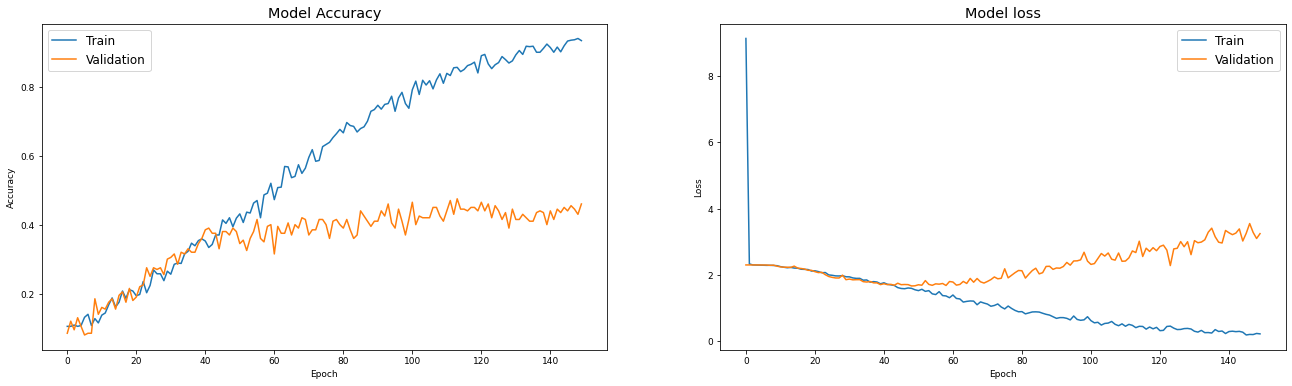

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 12})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training and validation loss values 
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

## Results

In [ ]:
# insert code here
# When you load your model you start from compile again, you can continue with the same parameters or you can change. or you can have a new set of data.For example different batches of the original dataset considering computer power. 
# training in batches you will get accuracy for each batch and then the learning from the previous step. Depending on results you can change arquitecture

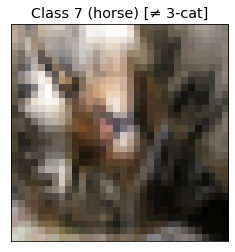

In [42]:
check_one(test_images, predictions, actual = y_test, compare = True)

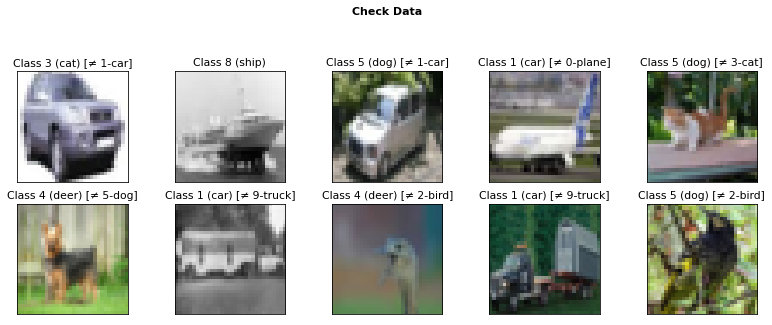

In [43]:
check_ten(test_images, predictions, y_test, True)

## Save and Load models and Weights

### Save

In [48]:
## save model
model_json = model.to_json()
with open('C:/Users/Monica/Desktop/IoD-Folders/MODULE 10/Labs/Lab_answers/data/model.json', 'w') as json_file:
      json_file.write(model_json)
        
# save weights
model.save_weights('C:/Users/Monica/Desktop/IoD-Folders/MODULE 10/Labs/Lab_answers/data/model.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Monica/Desktop/IoD-Folders/MODULE 10/Labs/Lab_answers/data/model.json'



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



